# MT Penetration Depth Profiles over 2DLine and 3DGrid

In [1]:
import sys 
import os
import glob
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['lines.color'] = 'r'

mpl.rcParams['figure.figsize']=[20,10]

import mtpy.core.mt as mt
import mtpy.modeling.occam2d_rewrite as occam2d_new

#Supress default INFO logging
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
logger.propagate = False

INFO:root:module file: E:\Githubz\mtpy2\mtpy\utils\mtpylog.pyc
INFO:root:Effective yaml configuration file E:\Githubz\mtpy2\mtpy\utils\logging.yml


2017-09-01T11:21:00 - root - INFO - module file: E:\Githubz\mtpy2\mtpy\utils\mtpylog.pyc
2017-09-01T11:21:00 - root - INFO - Effective yaml configuration file E:\Githubz\mtpy2\mtpy\utils\logging.yml


In [2]:
# Windows File system
edi_dir=r"E:/Githubz/mtpy2/tests/data/edifiles/"
#edi_dir=r"E:\Datasets\MT_Datasets\3D_MT_data_edited_fromDuanJM"

#edi_dir=r"E:/Githubz/mtpy2/examples/data/edi2"
#edi_dir=r"E:\Datasets\RD_GeophysSurvey\75098\EDI_files"  # not same periods
#edi_dir=r"E:\Datasets\RD_GeophysSurvey\75099_Youanmi\EDI Files\bb_edi\YN3_edi_bb"
#edi_dir=r"E:\Datasets\RD_GeophysSurvey\75099_Youanmi\EDI Files\lp_edi"  # not same periods

# Linux OS files
#edi_dir="/Softlab/Githubz/mtpy2/tests/data/edifiles/"
#edi_dir="/Softlab/Githubz/mtpy2/examples/data/edi2"  #edi_files/"

edifiles = glob.glob(os.path.join(edi_dir, '*.edi'))

print (edifiles)

['E:/Githubz/mtpy2/tests/data/edifiles\\15125A.edi', 'E:/Githubz/mtpy2/tests/data/edifiles\\15126A.edi', 'E:/Githubz/mtpy2/tests/data/edifiles\\15127A.edi', 'E:/Githubz/mtpy2/tests/data/edifiles\\15128A.edi', 'E:/Githubz/mtpy2/tests/data/edifiles\\15129A.edi', 'E:/Githubz/mtpy2/tests/data/edifiles\\15130A.edi', 'E:/Githubz/mtpy2/tests/data/edifiles\\16122A.edi', 'E:/Githubz/mtpy2/tests/data/edifiles\\16123A.edi', 'E:/Githubz/mtpy2/tests/data/edifiles\\16124A.edi', 'E:/Githubz/mtpy2/tests/data/edifiles\\16125A.edi', 'E:/Githubz/mtpy2/tests/data/edifiles\\16126A.edi', 'E:/Githubz/mtpy2/tests/data/edifiles\\16127A.edi']


E:\Githubz\mtpy2\mtpy\analysis\zinvariants.py:228: RuntimeWarning: invalid value encountered in arcsin
  strikeangerr = abs(.5 * np.arcsin(inv7)) * (180 / np.pi)


Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq a

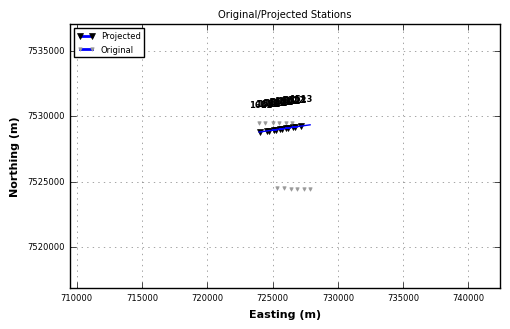

In [3]:
# stations = ['151{0:02}A'.format(s) for s in range(24, 31)]
# pr = occam2d_new.Profile(edi_path=edi_dir, station_list=stations)

pr = occam2d_new.Profile(edi_path=edi_dir)
pr.generate_profile()
# set station labels to only be from 1st to 4th index 
# of station name
      
pr.plot_profile(station_id=[0,4])

In [4]:
 pr.station_locations

array([    0.        ,   478.83292003,   675.24333872,  1027.83734907,
        1172.79154629,  1518.89335461,  1666.42259118,  1995.80961378,
        2166.7956371 ,  2489.21181362,  2649.15965681,  3144.2642754 ])

In [5]:
pr.edi_list

In [6]:
# See http://localhost:8888/notebooks/examples/notebooks/Apparent_Resistivity_Penetration_Depth.ipynb
# def plotbar_pen_depth(per_index, edifiles):

per_index=2
    
scale_param = np.sqrt(1.0 / (2.0 * np.pi * 4 * np.pi * 10 ** (-7)))
print(scale_param)
#per_index=0,1,2,....    
periods=[] 

app_resis=[]

stations=[]
    
for mt_obj in pr.edi_list:

    # the attribute Z
    zeta=mt_obj.Z
    

    if per_index>=len(zeta.freq):
        raise Exception("Index out_of_range Error: period index must be less than number of periods in zeta.freq")

    per=1.0/zeta.freq[per_index]
    periods.append(per)

    penetration_depth = - scale_param * np.sqrt(zeta.resistivity[per_index, 0, 1] * per)
    app_resis.append(penetration_depth)

    stations.append(mt_obj.station)
    

355.881271709


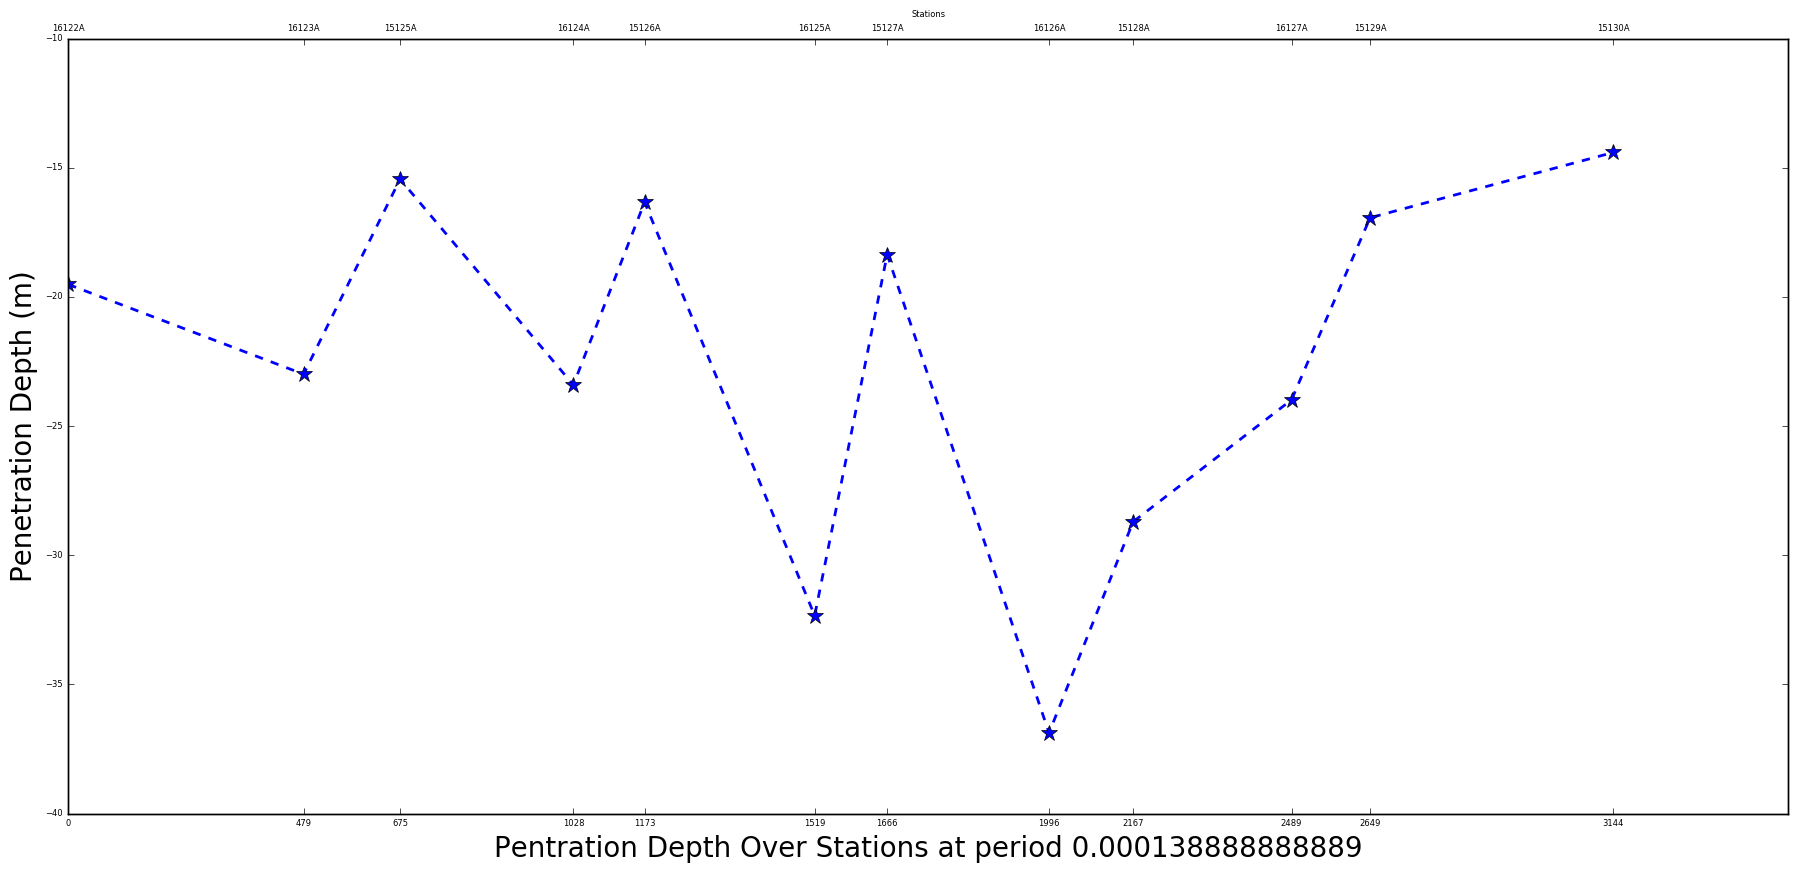

In [7]:

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()


#plt.bar(index, app_resis, color='#000000')
ax1.plot(pr.station_locations, app_resis, '--*', markersize="12", linewidth="2", label="Penetration Depth")
# plt.xaxis.tick_top()
# plt.set_xlabel('X LABEL')    
# plt.xaxis.set_label_position('top') 

ax1.set_xlabel('Pentration Depth Over Stations at period %s'%periods[0],fontsize=20)
ax1.set_xticks(pr.station_locations)
ax1.set_ylabel('Penetration Depth (m)', fontsize=20)


ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(pr.station_locations)
ax2.set_xticklabels(stations)
ax2.set_xlabel(r"Stations")

#plt.show()

In [ ]:
#http://stackoverflow.com/questions/10514315/how-to-add-a-second-x-axis-in-matplotlib


# import numpy as np
# import matplotlib.pyplot as plt

# fig = plt.figure()
# ax1 = fig.add_subplot(111)
# ax2 = ax1.twiny()

# X = np.linspace(0,1,1000)
# Y = np.cos(X*20)

# ax1.plot(X,Y)
# ax1.set_xlabel(r"Original x-axis: $X$")
# ax1.grid(True)
# new_tick_locations = np.array([.2, .5, .9])

# def tick_function(X):
#     V = 1/(1+X)
#     return ["%.3f" % z for z in V]

# ax2.set_xlim(ax1.get_xlim())
# ax2.set_xticks(new_tick_locations)
# ax2.set_xticklabels(tick_function(new_tick_locations))
# ax2.set_xlabel(r"Modified x-axis: $1/(1+X)$")

# plt.show()


In [ ]:
# plt.plot?

#plt.legend?

#plt.xticks?
#OR
help(plt.xticks)

In [ ]:
# pr.geoelectric_strike = 45 # preset a rotation angle

# pr.generate_profile()

# pr.plot_profile()

In [ ]:
stations = ['151{0:02}A'.format(s) for s in range(24, 31)]
stations

# 3D-plot penetration depth profile over stations

    - For a given fre/per index of a set of edifiles, the (lat, lon) are extracted and bounding box calculated.
    - A pmesh is made with None value initially for all pixels, reset the pixels value according to the MT station pen-depth. 
    - Finally show the pcolor plot

In [ ]:
def get_penetration_depth(per_index, edifiles):
    """ input period index and a list of edi files,
    return tuple of lists (stations, periods, penetrationdepth, lat-lons-pairs)
    """
    
    scale_param = np.sqrt(1.0 / (2.0 * np.pi * 4 * np.pi * 10 ** (-7)))
    
    #per_index=0,1,2,....    
    periods=[] 
    
    pendep=[]
    
    stations=[]
    
    latlons=[]
    
    for afile in edifiles:
        mt_obj = mt.MT(afile)
        
        latlons.append((mt_obj.lat, mt_obj.lon))
        
    
        # the attribute Z
        zeta=mt_obj.Z
        
        if per_index>=len(zeta.freq):
            raise Exception("Index out_of_range Error: period index must be less than number of periods in zeta.freq")
        
        per=1.0/zeta.freq[per_index]
        periods.append(per)
       
        penetration_depth = - scale_param * np.sqrt(zeta.resistivity[per_index, 0, 1] * per)
        pendep.append(penetration_depth)
        
        stations.append(mt_obj.station)
        

    return (stations,periods,pendep, latlons )

In [ ]:
(stations,periods,pendep, latlons )=get_penetration_depth(10, edifiles)

In [ ]:
stations

In [ ]:
periods  # All must be of the same value across stations

In [ ]:
pendep

In [ ]:
latlons

In [ ]:
def get_bounding_box(latlons):
    """ get min max lat lon from the list of lat-lon-pairs points"""
    lats=[tup[0] for tup in latlons]
    lons=[tup[1] for tup in latlons]

    minlat=min(lats)
    maxlat=max(lats)

    print(minlat, maxlat)

    minlon= min(lons)
    maxlon= max(lons)

    print(minlon, maxlon)
    
    return ((minlon,maxlon), (minlat, maxlat))

In [ ]:
bbox=get_bounding_box(latlons)

In [ ]:
bbox

# Make a gridded Image with suitable pixel size/resolution

In [ ]:
xgrids= bbox[0][1] - bbox[0][0]
ygrids= bbox[1][1] - bbox[1][0]

print(xgrids, ygrids)

#Pixel size in Degree:  0.001=100meters, 0.01=1KM 1deg=100KM

pixelsize=0.002  #Degree 0.001=100meters, 0.01=1KM 1deg=100KM

nx= int(np.ceil(xgrids/pixelsize))
ny= int(np.ceil(ygrids/pixelsize))


print(nx, ny)

In [ ]:
# make an image bigger than the (nx, ny)   
pad=2

nx2= nx + pad
ny2= ny+ pad

# Z = 0.0* np.random.random((nx2,ny2))   # Test data
# Z=  np.ones((nx2,ny2))
zdep=   np.zeros((ny2,nx2))
# Z[10, 10]=12
# Z[11, 20]=20
# Z[13, 15]=30

zdep[:,:]=np.nan

zdep.shape

In [ ]:
round(3.519)

In [ ]:
offset=0
minlat= bbox[1][0]
minlon= bbox[0][0]
# LL_lat= minlat -offset*pixelsize
# LL_lon= minlon -offset*pixelsize

# UR_lat=maxlat + offset*pixelsize
# UR_lon= maxlon + offset*pixelsize

def get_index(lat, lon, offset=1):
    index_x = (lon - minlon)/pixelsize
    index_y= (lat- minlat)/pixelsize
    
    ix=int(round(index_x))
    iy=int(round(index_y))
    
    print (ix, iy)
    
    return(ix+offset, iy+offset)


In [ ]:
for iter, pair in enumerate(latlons):
    print pair
    (xi,yi)= get_index(pair[0], pair[1])
    zdep[zdep.shape[0]-yi,xi] = np.abs(pendep[iter])

In [ ]:
plt.imshow(zdep, interpolation='none')
#plt.imshow(zdep,  interpolation='spline36')
plt.colorbar()

In [ ]:
# 1)Tips lat-lon orientation: lat <=> north-south; y-coordinate; the first index of the Image2D(first, second)  

# 2) interpolation? image pixels
plt.imshow?

In [ ]:
zdep.shape

In [ ]:
from pykrige.uk import UniversalKriging
import numpy as np

data = np.array([[0.3, 1.2, 0.47],
                 [1.9, 0.6, 0.56],
                 [1.1, 3.2, 0.74],
                 [3.3, 4.4, 1.47],
                 [4.7, 3.8, 1.74]])

gridx = np.arange(0.0, 5.5, 0.5)
gridy = np.arange(0.0, 5.5, 0.5)

# Create the ordinary kriging object. Required inputs are the X-coordinates of
# the data points, the Y-coordinates of the data points, and the Z-values of the
# data points. Variogram is handled as in the ordinary kriging case.
# drift_terms is a list of the drift terms to include; currently supported terms
# are 'regional_linear', 'point_log', and 'external_Z'. Refer to 
# UniversalKriging.__doc__ for more information.
UK = UniversalKriging(data[:, 0], data[:, 1], data[:, 2], variogram_model='linear',
                      drift_terms=['regional_linear'],enable_plotting=True)

# Creates the kriged grid and the variance grid. Allows for kriging on a rectangular
# grid of points, on a masked rectangular grid of points, or with arbitrary points.
# (See UniversalKriging.__doc__ for more information.)
z, ss = UK.execute('grid', gridx, gridy)

In [ ]:
gridx

In [ ]:
data[:,0]

In [ ]:
import pykrige.kriging_tools as kt
# Writes the kriged grid to an ASCII grid file.
kt.write_asc_grid(gridx, gridy, z, filename="output.asc")

In [ ]:
plt.imshow(z)

In [ ]:
gridyy = np.arange(0.0, zdep.shape[0], 1.0)
gridxx = np.arange(0.0, zdep.shape[1], 1.0)

In [ ]:
gridxx

In [ ]:
datax=np.zeros(len(latlons))
datay=np.zeros(len(latlons))

dataz=np.zeros(len(latlons))


for iter, pair in enumerate(latlons):
    print pair
    (i,j)= get_index(pair[0], pair[1])
    datax[iter]=i
    datay[iter]=zdep.shape[0]-j
    dataz[iter] = np.abs(pendep[iter])

In [ ]:
dataz

In [ ]:
datay

In [ ]:
UK = UniversalKriging(datax, datay, dataz, variogram_model='linear', nlags=14,
                      drift_terms=['regional_linear'],enable_plotting=True)

# Creates the kriged grid and the variance grid. Allows for kriging on a rectangular
# grid of points, on a masked rectangular grid of points, or with arbitrary points.
# (See UniversalKriging.__doc__ for more information.)
z, ss = UK.execute('grid', gridxx, gridyy)

In [ ]:
# Writes the kriged grid to an ASCII grid file.
kt.write_asc_grid(gridxx, gridyy, z, filename="Pen_depth_interp_krigged.asc")

In [ ]:
plt.imshow(z, interpolation='none')
plt.colorbar()

In [ ]:
plt.imshow(zdep,  interpolation='none')
#plt.imshow(zdep,  interpolation='spline36')
plt.colorbar()

In [ ]:
z

In [ ]:
# See https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html

from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np


def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2


def demo_griddata():
    grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
    points = np.random.rand(1000, 2)
    values = func(points[:,0], points[:,1])


    grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
    grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
    grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')


    plt.subplot(221)
    plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
    plt.plot(points[:,0], points[:,1], 'k.', ms=1)
    plt.title('Original')
    plt.subplot(222)
    plt.imshow(grid_z0.T,  extent=(0,1,0,1),origin='lower')
    plt.title('Nearest')
    plt.subplot(223)
    plt.imshow(grid_z1.T,extent=(0,1,0,1), origin='lower')
    plt.title('Linear')
    plt.subplot(224)
    plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
    plt.title('Cubic')
    plt.gcf().set_size_inches(6, 6)
    plt.show()


In [ ]:
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np

print(zdep.shape[0],zdep.shape[1])
#grid_x, grid_y = np.mgrid[0:95:96j, 0:83:84j] # how to param this mesh construction ?
grid_x, grid_y = np.mgrid[0:zdep.shape[0]:1, 0:zdep.shape[1]:1] 
#this is more straight forward.
# print (grid_x, grid_y)
points = np.zeros((len(latlons), 2))
values = np.zeros( len(latlons) )

for iter, pair in enumerate(latlons):
#     print pair

    (i,j)= get_index(pair[0], pair[1])
    points[iter,0]=zdep.shape[0]-j
    points[iter,1]=i
    values[iter] = np.abs(pendep[iter])

grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')


#plt.imshow(grid_z)

plt.subplot(221)
# plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
# plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.imshow(zdep,  interpolation='none')
#plt.colorbar()
plt.title('Original')
# plt.subplot(222)
plt.colorbar()
# plt.imshow(grid_z0,  origin='upper')
# plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1, origin='upper')
plt.title('Period=%s'%periods[0])
# plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2, origin='upper')
plt.plot( points[:,1], points[:,0], 'kv', markersize=6)
plt.title('Period=%s'%periods[0]) #Cubic
plt.gcf().set_size_inches(6, 6)

plt.show()


In [ ]:
# orgin issue
plt.plot(points[:,1],points[:,0],  'kv', markersize=12)  #origin upper?

In [ ]:
grid_x

In [ ]:
values


In [ ]:
grid_z1

In [ ]:
# grid_x

# grid_y.shape

# points.shape

In [ ]:
grid_x, grid_y = np.mgrid[0:95:1, 0:83:1]

In [ ]:
print(grid_x.shape)

grid_x

In [ ]:
grid_y

In [ ]:
from pylab import *
import csv

array_=arange(0,10,1)
list_=[array_,array_*2,array_*3]
with open("output.csv", "wb") as f:
    writer = csv.writer(f)
    writer.writerows(list_)

# Number of Significant Digit

In [ ]:
#http://stackoverflow.com/questions/22261843/python-np-round-with-decimal-option-larger-than-2

def roundsf(number, sf):
    """
    round a number to a specified number of significant figures (sf)
    """
    # can't have < 1 s.f.
    sf = max(sf,1.)
    rounding = int(np.ceil(-np.log10(number) + sf - 1.))
    print (rounding)
    
    return np.round(number, rounding)

In [ ]:
roundsf(141.318666666666, 5)

In [ ]:
roundsf( 0.00016159004605, 4)

In [ ]:
print np.round(141.318666666666, 3)

In [ ]:
print type(np.around(1.23456789, decimals=3))

In [ ]:
np.arange(0, 30,2)

## How to Reverse Colorbar

http://stackoverflow.com/questions/3279560/invert-colormap-in-matplotlib


In [ ]:
# http://stackoverflow.com/questions/3279560/invert-colormap-in-matplotlib
    
import matplotlib.pyplot as plt
import matplotlib as mpl
def reverse_colourmap(cmap, name = 'my_cmap_r'):
    """
    In: 
    cmap, name 
    Out:
    my_cmap_r

    Explanation:
    t[0] goes from 0 to 1
    row i:   x  y0  y1 -> t[0] t[1] t[2]
                   /
                  /
    row i+1: x  y0  y1 -> t[n] t[1] t[2]

    so the inverse should do the same:
    row i+1: x  y1  y0 -> 1-t[0] t[2] t[1]
                   /
                  /
    row i:   x  y1  y0 -> 1-t[n] t[2] t[1]
    """        
    reverse = []
    k = []   

    for key in cmap._segmentdata:    
        k.append(key)
        channel = cmap._segmentdata[key]
        data = []

        for t in channel:                    
            data.append((1-t[0],t[2],t[1]))            
        reverse.append(sorted(data))    

    LinearL = dict(zip(k,reverse))
    my_cmap_r = mpl.colors.LinearSegmentedColormap(name, LinearL) 
    return my_cmap_r

In [ ]:
#my_cmap = mpl.cm.cool
my_cmap = mpl.cm.jet

my_cmap_r = reverse_colourmap(my_cmap)

fig = plt.figure(figsize=(8, 2))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
ax2 = fig.add_axes([0.05, 0.475, 0.9, 0.15])
#norm = mpl.colors.Normalize(vmin=0, vmax=1)
# cb1 = mpl.colorbar.ColorbarBase(ax1, cmap = my_cmap, norm=norm,orientation='horizontal')
# cb2 = mpl.colorbar.ColorbarBase(ax2, cmap = my_cmap_r, norm=norm, orientation='horizontal')

cb1 = mpl.colorbar.ColorbarBase(ax1, cmap = my_cmap,orientation='horizontal')
cb2 = mpl.colorbar.ColorbarBase(ax2, cmap = my_cmap_r,orientation='horizontal')

In [ ]:
#customised color map
cdict1 = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 0.1),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 1.0),
                   (0.5, 0.1, 0.0),
                   (1.0, 0.0, 0.0))
         }

blue_red1 = mpl.colors.LinearSegmentedColormap('BlueRed1', cdict1)
blue_red1_r = reverse_colourmap(blue_red1)

fig = plt.figure(figsize=(8, 2))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
ax2 = fig.add_axes([0.05, 0.475, 0.9, 0.15])

norm = mpl.colors.Normalize(vmin=0, vmax=1)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap = blue_red1, norm=norm,orientation='horizontal')
cb2 = mpl.colorbar.ColorbarBase(ax2, cmap = blue_red1_r, norm=norm, orientation='horizontal')

In [ ]:
mpl.colorbar.ColorbarBase?

In [ ]:
# http://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point
# http://matplotlib.org/examples/mplot3d/text3d_demo.html
y=[2.56422, 3.77284,3.52623,3.51468,3.02199]
z=[0.15, 0.3, 0.45, 0.6, 0.75]
n=['MT1','MT2',393,203,'MT123']

fig, ax = plt.subplots()
ax.scatter(z, y,s=40, c='r',marker='^')

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))